<a href="https://colab.research.google.com/github/flaviorv/ai_model_lifecycle/blob/tp2/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Feature Selection

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as KNN
import seaborn as sns

breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

#Separating train, validation and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42)

result = {
    'recall': [],
    'features': [],
    'neighbors': [],
    'masks': {}
}

#Wrapper with different number of neighbors and features
for nk in range(10, 31, 10):
  for nf in range(5, 26, 10):
    knn = KNN(n_neighbors=nk)
    sfs = SFS(
        estimator=knn,
        n_features_to_select=nf,
        scoring='recall',
        cv=2,
        n_jobs=-1
    )

    sfs.fit(x_train, y_train)
    mask = sfs.get_support(indices=True)
    recall = cross_val_score(knn, x_val, y_val, cv=5, scoring='recall')
    recall_mean = recall.mean()
    print(f"Recall {recall.mean():<20} Neighbors {nk:>3} Features {nf:>3}")
    result['recall'].append(recall_mean)
    result['neighbors'].append(nk)
    result['features'].append(nf)
    if nf not in result['masks']:
        result['masks'][nf] = []
    result['masks'][nf].append(mask)

Recall 0.9636363636363636   Neighbors  10 Features   5
Recall 0.9636363636363636   Neighbors  10 Features  15
Recall 0.9636363636363636   Neighbors  10 Features  25
Recall 1.0                  Neighbors  20 Features   5
Recall 1.0                  Neighbors  20 Features  15
Recall 1.0                  Neighbors  20 Features  25
Recall 1.0                  Neighbors  30 Features   5
Recall 1.0                  Neighbors  30 Features  15
Recall 1.0                  Neighbors  30 Features  25


###Chart with the best combination for the best recall

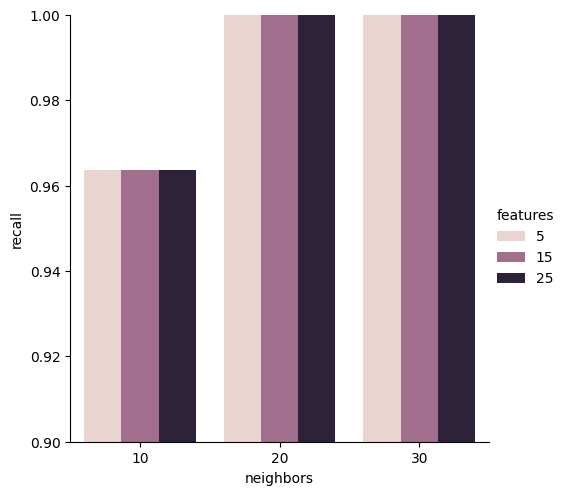

In [20]:
chart = sns.catplot(data=result, x="neighbors", y="recall", hue='features', kind='bar')
chart.set(ylim=(0.9, 1.0))

###Finding the best combination in the test

In [40]:
best_nf = 5
best_nk = [20, 30]

for nk in best_nk:
  knn = KNN(n_neighbors=nk)
  knn.fit(x_train, y_train)
  for i in range(len(result['masks'][best_nf])):
    selected_features = result['masks'][best_nf][i]
    score = cross_val_score(knn, x_test[:, selected_features], y_test, cv=5, scoring='recall')
    print(f'Neighbors {nk}')
    print(f'Features {breast_cancer.feature_names[selected_features]}')
    print('Recall', score.mean(), '\n')

Neighbors 20
Features ['mean concave points' 'mean fractal dimension' 'texture error'
 'worst smoothness' 'worst concave points']
Recall 0.9857142857142858 

Neighbors 20
Features ['mean radius' 'mean smoothness' 'mean compactness' 'mean concavity'
 'worst radius']
Recall 1.0 

Neighbors 20
Features ['mean radius' 'mean perimeter' 'mean smoothness' 'mean compactness'
 'area error']
Recall 0.9714285714285715 

Neighbors 30
Features ['mean concave points' 'mean fractal dimension' 'texture error'
 'worst smoothness' 'worst concave points']
Recall 1.0 

Neighbors 30
Features ['mean radius' 'mean smoothness' 'mean compactness' 'mean concavity'
 'worst radius']
Recall 1.0 

Neighbors 30
Features ['mean radius' 'mean perimeter' 'mean smoothness' 'mean compactness'
 'area error']
Recall 0.9857142857142858 

